In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

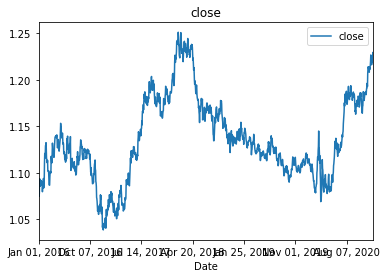

In [3]:
df = pd.read_csv('EUR USD Historical Data.csv')

df = df.drop(1306)
df = df.iloc[::-1]
df = df[1:]



df = df.rename(columns={"Price": "close"})
cols = df.columns
for col in cols[1:-1]:
    
     df[col] = df[col].astype(float)


#
#display(df)

df.plot(x="Date", y=["close"], title='close')


              Date   close    Open    High     Low Change %  Price_SMA
1304  Jan 01, 2016  1.0860  1.0862  1.0869  1.0845    -0.01        NaN
1303  Jan 04, 2016  1.0831  1.0858  1.0949  1.0783    -0.27        NaN
1302  Jan 05, 2016  1.0748  1.0831  1.0840  1.0711    -0.77        NaN
1301  Jan 06, 2016  1.0781  1.0749  1.0802  1.0721     0.31        NaN
1300  Jan 07, 2016  1.0936  1.0779  1.0941  1.0770     1.44        NaN
...            ...     ...     ...     ...     ...      ...        ...
4     Dec 25, 2020  1.2204  1.2186  1.2212  1.2165     0.15   1.214500
3     Dec 28, 2020  1.2214  1.2202  1.2251  1.2181     0.08   1.215930
2     Dec 29, 2020  1.2247  1.2217  1.2276  1.2207     0.27   1.216815
1     Dec 30, 2020  1.2295  1.2248  1.2311  1.2246     0.39   1.217715
0     Dec 31, 2020  1.2214  1.2299  1.2309  1.2209    -0.66   1.218085

[1305 rows x 7 columns]


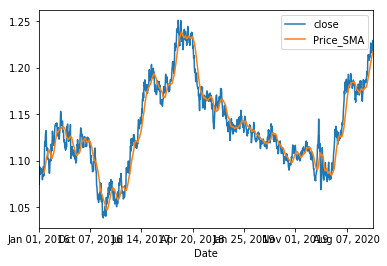

In [4]:
## adding moving average
window_size = 20
df['Price_SMA'] = df['close'].rolling(window=window_size).mean()
df.plot(x="Date", y=["close", 'Price_SMA'])
print(df)

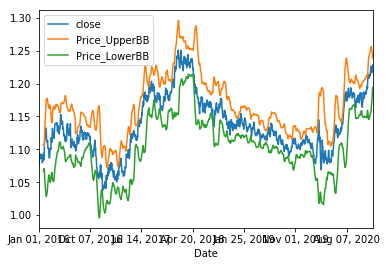

In [5]:
##bollinger bands

rstd = df['close'].rolling(window=20).std()
df['Price_UpperBB'] = df['Price_SMA']+ 4 * rstd
df['Price_LowerBB'] = df['Price_SMA']- 4 * rstd

df.plot(x="Date", y=["close", 'Price_UpperBB', 'Price_LowerBB'])
#print(df)

,Date,close,Open,High,Low,Change %,Price_SMA,Price_UpperBB,Price_LowerBB,SAR,stochiasticRSI1,stochiasticRSI2
1304,"Jan 01, 2016",1.0860,1.0862,1.0869,1.0845,-0.01,NaN,NaN,NaN,NaN,NaN,NaN
1303,"Jan 04, 2016",1.0831,1.0858,1.0949,1.0783,-0.27,NaN,NaN,NaN,1.094900,NaN,NaN
1302,"Jan 05, 2016",1.0748,1.0831,1.0840,1.0711,-0.77,NaN,NaN,NaN,1.094900,NaN,NaN
1301,"Jan 06, 2016",1.0781,1.0749,1.0802,1.0721,0.31,NaN,NaN,NaN,1.094900,NaN,NaN
1300,"Jan 07, 2016",1.0936,1.0779,1.0941,1.0770,1.44,NaN,NaN,NaN,1.071100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4,"Dec 25, 2020",1.2204,1.2186,1.2212,1.2165,0.15,1.214500,1.244771,1.184229,1.213302,30.484836,19.202223
3,"Dec 28, 2020",1.2214,1.2202,1.2251,1.2181,0.08,1.215930,1.238853,1.193007,1.214148,100.000000,48.382153
2,"Dec 29, 2020",1.2247,1.2217,1.2276,1.2207,0.27,1.216815,1.239395,1.194235,1.214943,100.000000,76.828279
1,"Dec 30, 2020",1.2295,1.2248,1.2311,1.2246,0.39,1.217715,1.242371,1.193059,1.215956,100.000000,100.000000


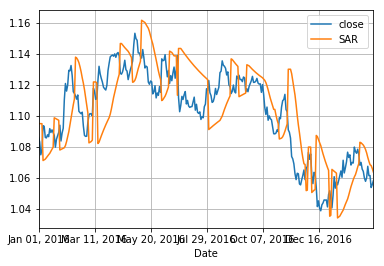

In [6]:
#SAR
import talib as ta
df['SAR'] = ta.SAR(df.High, df.Low, acceleration=0.02, maximum=0.2)

stocrsi = ta.STOCHRSI(df['close'], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)

df['stochiasticRSI1'] = stocrsi[0]
df['stochiasticRSI2'] = stocrsi[1]
display(df)
df[:300].plot(x="Date", y=["close", 'SAR'])
plt.grid()
plt.show()


##feature selection : genetic algorithms -- PCA -- many techniques --> a paper only on this  
## get a list of indicator  : check whether they work
## in literature ::: which ones have most uses
##vurudie ma: indicator hastesh
##optimize parameters



In [7]:
#2000-2010 :30 %

##adding some indicators from stockstats
from stockstats import StockDataFrame as Sdf

def add_indicator(name, stock_df):
    indicator = stock_df.get(name)
    df[name] = [indicator[i] for i in range(len(indicator))]

df2 = df.copy()
stock_df = Sdf.retype(df2)
print(stock_df.columns)

indicators = ['macd', 'rsi_14', 'tema']

for ind in indicators:
    add_indicator(ind, stock_df)



display(df)

#df[:300].plot(x="Date", y=["macd", 'rsi_14'])
#display(df)

Index(['close', 'open', 'high', 'low', 'change %', 'price_sma',
       'price_upperbb', 'price_lowerbb', 'sar', 'stochiasticrsi1',
       'stochiasticrsi2'],
      dtype='object')


,Date,close,Open,High,Low,Change %,Price_SMA,Price_UpperBB,Price_LowerBB,SAR,stochiasticRSI1,stochiasticRSI2,macd,rsi_14,tema
1304,"Jan 01, 2016",1.0860,1.0862,1.0869,1.0845,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.086000
1303,"Jan 04, 2016",1.0831,1.0858,1.0949,1.0783,-0.27,NaN,NaN,NaN,1.094900,NaN,NaN,-0.000065,0.000000,1.083286
1302,"Jan 05, 2016",1.0748,1.0831,1.0840,1.0711,-0.77,NaN,NaN,NaN,1.094900,NaN,NaN,-0.000340,0.000000,1.075840
1301,"Jan 06, 2016",1.0781,1.0749,1.0802,1.0721,0.31,NaN,NaN,NaN,1.094900,NaN,NaN,-0.000338,24.430595,1.076794
1300,"Jan 07, 2016",1.0936,1.0779,1.0941,1.0770,1.44,NaN,NaN,NaN,1.071100,NaN,NaN,0.000287,66.199780,1.089269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,"Dec 25, 2020",1.2204,1.2186,1.2212,1.2165,0.15,1.214500,1.244771,1.184229,1.213302,30.484836,19.202223,0.007738,63.968383,1.219204
3,"Dec 28, 2020",1.2214,1.2202,1.2251,1.2181,0.08,1.215930,1.238853,1.193007,1.214148,100.000000,48.382153,0.007486,64.839781,1.220530
2,"Dec 29, 2020",1.2247,1.2217,1.2276,1.2207,0.27,1.216815,1.239395,1.194235,1.214943,100.000000,76.828279,0.007466,67.622531,1.223452
1,"Dec 30, 2020",1.2295,1.2248,1.2311,1.2246,0.39,1.217715,1.242371,1.193059,1.215956,100.000000,100.000000,0.007748,71.193787,1.228046


In [8]:
#### adding PCA

df_copy = df.copy()

pca = PCA(n_components=0.95)
df_copy = df_copy.dropna()

#display(df_copy)

all_cols = df_copy.columns

removebles = ['Date', 'Open', 'High', 'Low' ,'Change %']

features = [i for i in all_cols if i not in removebles]
print(features)
x = df_copy.loc[:, features].values




principalComponents = pca.fit_transform(x)
num_of_components = principalComponents.shape[1]

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component ' + str(i + 1) for i in range(num_of_components)])


['close', 'Price_SMA', 'Price_UpperBB', 'Price_LowerBB', 'SAR', 'stochiasticRSI1', 'stochiasticRSI2', 'macd', 'rsi_14', 'tema']


,Date,close,Open,High,Low,Change %,Price_SMA,Price_UpperBB,Price_LowerBB,SAR,stochiasticRSI1,stochiasticRSI2,macd,rsi_14,tema
1304,"Jan 01, 2016",1.0860,1.0862,1.0869,1.0845,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.086000
1303,"Jan 04, 2016",1.0831,1.0858,1.0949,1.0783,-0.27,NaN,NaN,NaN,1.094900,NaN,NaN,-0.000065,0.000000,1.083286
1302,"Jan 05, 2016",1.0748,1.0831,1.0840,1.0711,-0.77,NaN,NaN,NaN,1.094900,NaN,NaN,-0.000340,0.000000,1.075840
1301,"Jan 06, 2016",1.0781,1.0749,1.0802,1.0721,0.31,NaN,NaN,NaN,1.094900,NaN,NaN,-0.000338,24.430595,1.076794
1300,"Jan 07, 2016",1.0936,1.0779,1.0941,1.0770,1.44,NaN,NaN,NaN,1.071100,NaN,NaN,0.000287,66.199780,1.089269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,"Dec 25, 2020",1.2204,1.2186,1.2212,1.2165,0.15,1.214500,1.244771,1.184229,1.213302,30.484836,19.202223,0.007738,63.968383,1.219204
3,"Dec 28, 2020",1.2214,1.2202,1.2251,1.2181,0.08,1.215930,1.238853,1.193007,1.214148,100.000000,48.382153,0.007486,64.839781,1.220530
2,"Dec 29, 2020",1.2247,1.2217,1.2276,1.2207,0.27,1.216815,1.239395,1.194235,1.214943,100.000000,76.828279,0.007466,67.622531,1.223452
1,"Dec 30, 2020",1.2295,1.2248,1.2311,1.2246,0.39,1.217715,1.242371,1.193059,1.215956,100.000000,100.000000,0.007748,71.193787,1.228046


,principal component 1,principal component 2
0,-29.710308,-42.499114
1,-3.457958,-1.816627
2,11.973183,20.801945
3,56.040737,9.846098
4,67.202957,-5.251105
...,...,...
1280,-31.297272,11.102405
1281,41.803920,29.118945
1282,58.750259,6.170905
1283,72.681314,-12.686040


[0.85190316 0.1149501 ]


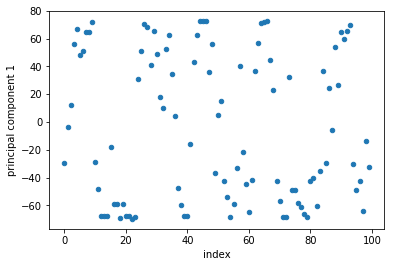

In [9]:
display(df)
display(principalDf)
principalDf[:100].reset_index().plot(kind='scatter', x='index', y='principal component 1')
print(pca.explained_variance_ratio_)

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [52]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(-1, 1))

#dataset = scaler.fit_transform(df.values[:, 1])
dataset = scaler.fit_transform(df.values[:, 1].reshape(-1, 1))
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)


model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
#model.add(LSTM(4, input_shape=(1,)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=2)
#model.fit(dataset[:, 2:], dataset[:, 1], epochs=1, batch_size=1, verbose=2)



# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


print(trainPredict.min())
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



874 431
(872, 1)
(872, 1, 1)
872/872 - 1s - loss: 0.0665
-0.8136334
Train Score: 0.01 RMSE
Test Score: 0.00 RMSE


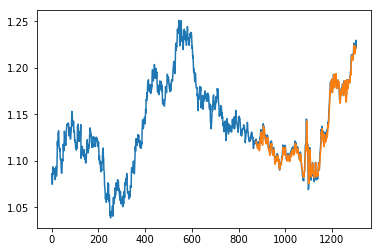

In [57]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()